# Previsão de doenças cardíacas

Neste exemplo é demonstrado o uso de um dataset obtido no kaggle de ocorrências de ataques cardíacos, para previsão

## Imports necessários

In [1]:
import numpy as np
import pandas as pd

## Carga do dataset

In [2]:
dados = pd.read_csv('../datasets/heart.csv', sep=',', encoding='iso-8859-1')
# encoding recomendados iso-8859-1, utf-8 e latin-1

## Exibição dos primeiros 5 registos

In [3]:
top5_records = dados.head()
top5_records

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exibição dos últimos 5 registros

In [4]:
last5_records = dados.tail()
last5_records

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Quantidade de linhas e colunas do dataset

In [5]:
dados.shape

(918, 12)

## Análise das variáveis (atributos)

In [6]:
# Registros com suas respectivas quantidades
dados['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [7]:
# Ordenando o resultado anterior
dados['Age'].value_counts().sort_index()
# decrescente
# dados['Age'].value_counts().sort_index(ascending=False)

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

## Usando histogramas

### Biblioteca

In [ ]:
!pip install plotly

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [53]:
import plotly.express as px

In [11]:
hist1 = px.histogram(dados, x='Age', nbins=60) # parametros: (dataset, valor do eixo x, largura da coluna)
hist1.update_layout(width=800, height=500, title_text='Distribuição das idades')
hist1.show()

## Seaborn - Outra forma de se gerar o histograma

<Axes: xlabel='Age', ylabel='Count'>

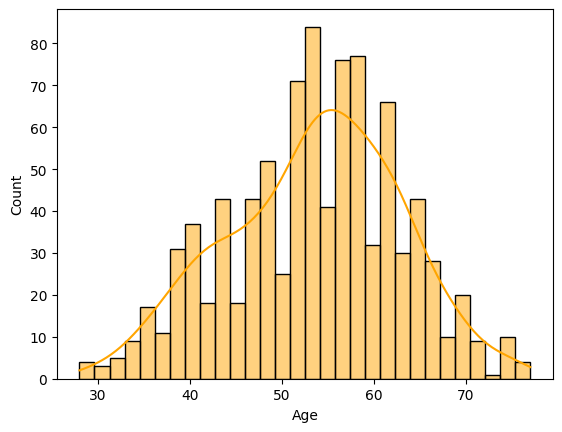

In [50]:
import seaborn as sns

sns.histplot(dados, x='Age', bins=30, color='orange', kde=True, stat='count') 
# kde = exibir uma linha mostrando a tendência de média de dados

## Contagem de itens de uma coluna

In [13]:
dados['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### Exibição da contagem anterior

<Axes: xlabel='Sex', ylabel='count'>

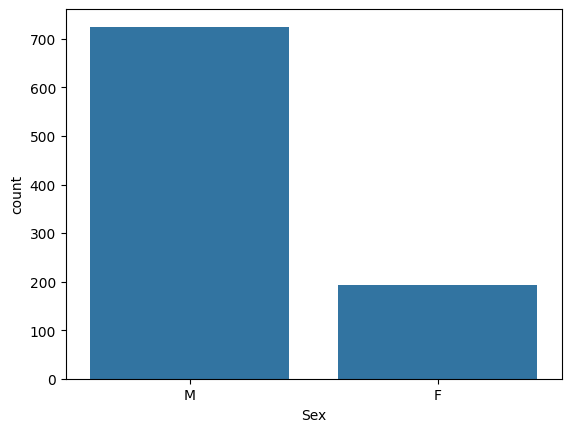

In [14]:
sns.countplot(x='Sex', data=dados)

## Chest pain type

In [ ]:
dados['ChestPainType'].value_counts()
# ASY = assintomático
# NAP = dor não anginosa
# ATA = angina atípica
# TA = angina típica
# Angina = dor no peito causada pela diminuição do fluxo de sangue no coração

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

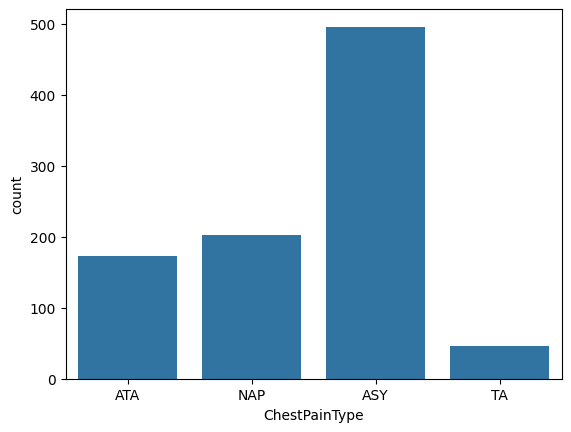

In [ ]:
sns.countplot(dados, x='ChestPainType', )

## Exercise Angina
Angina produzida por exercício

In [17]:
dados.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [18]:
px.pie(dados, 'ExerciseAngina')

## ST_Slope
Inclinação do segmento ST no ECG
Flat = plano
Up = para cima
Down = para aixo

In [19]:
dados.ST_Slope.value_counts() 

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [20]:
px.pie(dados, 'ST_Slope')

## Heart disease
Doença cardíaca

In [ ]:
dados.HeartDisease.value_counts()
# 0 = não possui doença cardíaca
# 1 = possui doença cardíaca

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [22]:
px.pie(dados, 'HeartDisease')

### Tipos de atributos do dataset

In [24]:
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [3]:
# Média de determinado campo
dados.Cholesterol.mean()

np.float64(198.7995642701525)

## Limpeza do dataset em um novo dataset

In [4]:
dados2 = dados.dropna() # remove missing values

In [6]:
dados2.shape

(918, 12)

In [ ]:
# substituindo os valores vazios pela média
dados2['Age'].fillna(dados2['Age'].mean(), inplace=True)

# substituindo os valores vazios / nulos por qualquer valor
dados2['Age'].fillna(10, inplace=True)

## Análises estatísticas descritivas

In [7]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# moda (o que mais apareceu)
dados.mode()
### Neste caso, a moda de "Age", por exemplo, está de igual / próxima à média (53.51), e mediana (54), indicando uma tendência para uma distribuição normal

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


## Tratando valores incoerentes

### Excluindo registro com pressão zero

In [ ]:
dados2 = dados.loc[dados['RestingBP'] != 0]

# checking
# len(dados2.loc[dados2['RestingBP'] == 0 ]) # => 0

917

In [38]:
dados2.shape

(917, 12)

In [36]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Substituindo valores zeros do colesterol pela média sem os zeros

In [ ]:
# mostrando a quantidade de zeros de colesterol
dados2.Cholesterol.value_counts()

Cholesterol
0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [41]:
# média de colesterol (neste caso tende a zero porque considera os zeros)
dados2.Cholesterol.mean()

np.float64(199.0163576881134)

In [42]:
# substituindo os zeros por nulos para retirar da contagem
dados2.Cholesterol.replace(0, np.nan, inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_10760\3903144229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados2.Cholesterol.replace(0, np.nan, inplace=True)
C:\Users\rafae\AppData\Local\Temp\ipykernel_10760\3903144229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2.Cholesterol.replace(0, np.nan, inplace=True)


In [43]:
# exibindo os totais de nulos no dataset
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [44]:
# nova média desconsiderando os nulos
dados2.Cholesterol.mean()

np.float64(244.6353887399464)

In [45]:
# substituindo os dados vazios pela média do colesterol
dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_10760\1724589823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)


In [ ]:
# totais agora não tem mais o colesterol nulo
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [47]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [48]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


<Axes: xlabel='Cholesterol', ylabel='Count'>

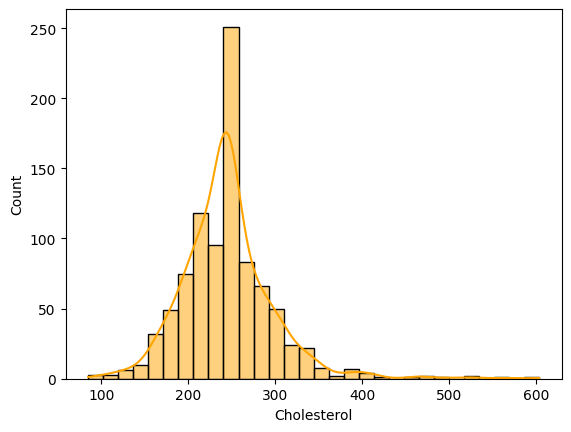

In [51]:
# visualizando o historigrama com as alterações no dataset
sns.histplot(dados2, x='Cholesterol', bins=30, color='orange', kde=True, stat='count')

### Análise de outliers (valores discrepantes na distribuição)

In [ ]:
# idade (tá ok já)
px.box(dados2, y='Age')

In [ ]:
# pressão sanguínea em repouso
px.box(dados2, y='RestingBP')

# Este gráfico apresenta pontos fora das linhas de topo e base, que são os outliers. 
# Neste caso, são valores importantes a serem considerados e não devem ser removidos

In [ ]:
# verificando o colesterol
px.box(dados2, y='Cholesterol')

# Também terão outliers (valores distantes da média [discrepantes]), que devem considerados

In [61]:
# Frequência cardíaca máxima
px.box(dados2, y='MaxHR')

### Salvando o dataset alterado

In [63]:
dados2.to_csv('../datasets/heart_tratado.csv', sep=';', encoding='utf-8', index=False)